In [3]:
# =========================================
# Multi-p CPD training & evaluation script
# =========================================
import os, re, random, math
import numpy as np
import pandas as pd
import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
import os, time, json, shutil

In [4]:
print(os.listdir("/kaggle/input/cl15-3lakh-per-p-type2-nn-dataset/out_tpye_two_15"))

['bsc_p0.01_C1_n15_k11.csv', 'bsc_p0.03_C1_n15_k11.csv', 'bsc_p0.07_C2_n15_k7.csv', 'bsc_p0.095_C1_n15_k11.csv', 'bsc_p0.08_C1_n15_k11.csv', 'bsc_p0.04_C2_n15_k7.csv', 'bsc_p0.055_C2_n15_k7.csv', 'bsc_p0.02_C1_n15_k11.csv', 'bsc_p0.015_C1_n15_k11.csv', 'bsc_p0.035_C2_n15_k7.csv', 'bsc_p0.075_C1_n15_k11.csv', 'bsc_p0.09_C2_n15_k7.csv', 'bsc_p0.05_C1_n15_k11.csv', 'bsc_p0.015_C2_n15_k7.csv', 'bsc_p0.06_C2_n15_k7.csv', 'bsc_p0.065_C1_n15_k11.csv', 'bsc_p0.06_C1_n15_k11.csv', 'bsc_p0.05_C2_n15_k7.csv', 'bsc_p0.025_C1_n15_k11.csv', 'bsc_p0.07_C1_n15_k11.csv', 'bsc_p0.025_C2_n15_k7.csv', 'bsc_p0.075_C2_n15_k7.csv', 'bsc_p0.045_C1_n15_k11.csv', 'bsc_p0.09_C1_n15_k11.csv', 'bsc_p0.055_C1_n15_k11.csv', 'bsc_p0.01_C2_n15_k7.csv', 'bsc_p0.035_C1_n15_k11.csv', 'bsc_p0.085_C2_n15_k7.csv', 'bsc_p0.03_C2_n15_k7.csv', 'bsc_p0.08_C2_n15_k7.csv', 'bsc_p0.095_C2_n15_k7.csv', 'bsc_p0.1_C1_n15_k11.csv', 'bsc_p0.085_C1_n15_k11.csv', 'bsc_p0.045_C2_n15_k7.csv', 'bsc_p0.02_C2_n15_k7.csv', 'bsc_p0.1_C2_n15_k7.

Held-out p values (UNSEEN in training): [0.055, 0.065]
Seen p values (used for training):     [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.06, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1]
Unique p values found: [0.055, 0.065, 0.08, 0.1, 0.01, 0.09, 0.06, 0.02, 0.025, 0.035, 0.095, 0.03, 0.04, 0.045, 0.085, 0.05, 0.015, 0.075, 0.07]
Total unique p values: 19
Training samples: 720000
Validation samples: 72000
Test (seen-p) samples: 72000
Test (unseen-p) samples: 72000


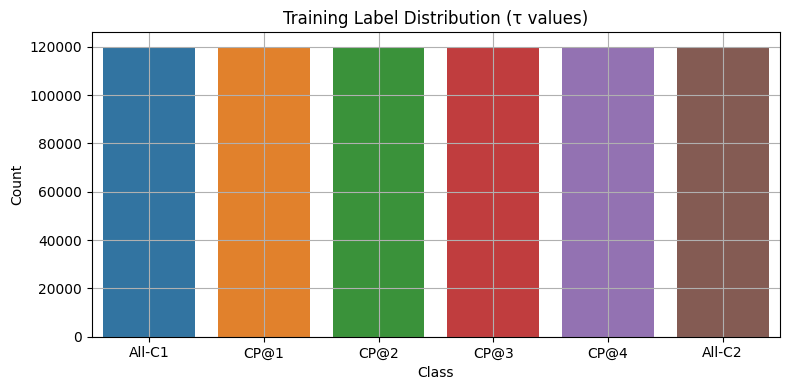

Training:   2%|▏         | 1/50 [01:06<53:54, 66.01s/it]

Epoch 01 | TrainLoss 1.7928 | ValAcc 0.1681


Training:   4%|▍         | 2/50 [02:12<52:51, 66.06s/it]

Epoch 02 | TrainLoss 1.7917 | ValAcc 0.1752


Training:   6%|▌         | 3/50 [03:18<51:47, 66.13s/it]

Epoch 03 | TrainLoss 1.7524 | ValAcc 0.2826


Training:   8%|▊         | 4/50 [04:24<50:47, 66.24s/it]

Epoch 04 | TrainLoss 1.6062 | ValAcc 0.3908


Training:  10%|█         | 5/50 [05:30<49:41, 66.25s/it]

Epoch 05 | TrainLoss 1.4395 | ValAcc 0.4799


Training:  12%|█▏        | 6/50 [06:36<48:20, 65.91s/it]

Epoch 06 | TrainLoss 1.3245 | ValAcc 0.5322


Training:  14%|█▍        | 7/50 [07:42<47:16, 65.97s/it]

Epoch 07 | TrainLoss 1.2469 | ValAcc 0.5763


Training:  16%|█▌        | 8/50 [08:48<46:09, 65.94s/it]

Epoch 08 | TrainLoss 1.1948 | ValAcc 0.5980


Training:  18%|█▊        | 9/50 [09:53<44:56, 65.78s/it]

Epoch 09 | TrainLoss 1.1611 | ValAcc 0.6147


Training:  20%|██        | 10/50 [10:59<43:58, 65.96s/it]

Epoch 10 | TrainLoss 1.1290 | ValAcc 0.6304


Training:  22%|██▏       | 11/50 [12:05<42:52, 65.97s/it]

Epoch 11 | TrainLoss 1.0997 | ValAcc 0.6417


Training:  24%|██▍       | 12/50 [13:11<41:45, 65.94s/it]

Epoch 12 | TrainLoss 1.0702 | ValAcc 0.6522


Training:  26%|██▌       | 13/50 [14:17<40:34, 65.79s/it]

Epoch 13 | TrainLoss 1.0443 | ValAcc 0.6618


Training:  28%|██▊       | 14/50 [15:23<39:29, 65.82s/it]

Epoch 14 | TrainLoss 1.0215 | ValAcc 0.6696


Training:  30%|███       | 15/50 [16:29<38:26, 65.90s/it]

Epoch 15 | TrainLoss 1.0008 | ValAcc 0.6749


Training:  32%|███▏      | 16/50 [17:35<37:25, 66.05s/it]

Epoch 16 | TrainLoss 0.9823 | ValAcc 0.6816


Training:  34%|███▍      | 17/50 [18:41<36:21, 66.10s/it]

Epoch 17 | TrainLoss 0.9668 | ValAcc 0.6877


Training:  36%|███▌      | 18/50 [19:47<35:08, 65.90s/it]

Epoch 18 | TrainLoss 0.9528 | ValAcc 0.6914


Training:  38%|███▊      | 19/50 [20:53<34:03, 65.91s/it]

Epoch 19 | TrainLoss 0.9397 | ValAcc 0.6950


Training:  40%|████      | 20/50 [21:58<32:53, 65.77s/it]

Epoch 20 | TrainLoss 0.9306 | ValAcc 0.7002


Training:  42%|████▏     | 21/50 [23:04<31:43, 65.65s/it]

Epoch 21 | TrainLoss 0.9215 | ValAcc 0.7041


Training:  44%|████▍     | 22/50 [24:09<30:35, 65.57s/it]

Epoch 22 | TrainLoss 0.9145 | ValAcc 0.7050


Training:  46%|████▌     | 23/50 [25:15<29:31, 65.61s/it]

Epoch 23 | TrainLoss 0.9066 | ValAcc 0.7063


Training:  48%|████▊     | 24/50 [26:20<28:23, 65.51s/it]

Epoch 24 | TrainLoss 0.9005 | ValAcc 0.7113


Training:  50%|█████     | 25/50 [27:26<27:19, 65.59s/it]

Epoch 25 | TrainLoss 0.8947 | ValAcc 0.7128


Training:  52%|█████▏    | 26/50 [28:31<26:12, 65.54s/it]

Epoch 26 | TrainLoss 0.8893 | ValAcc 0.7146


Training:  54%|█████▍    | 27/50 [29:37<25:11, 65.74s/it]

Epoch 27 | TrainLoss 0.8836 | ValAcc 0.7155


Training:  56%|█████▌    | 28/50 [30:44<24:12, 66.04s/it]

Epoch 28 | TrainLoss 0.8780 | ValAcc 0.7176


Training:  58%|█████▊    | 29/50 [31:49<23:01, 65.80s/it]

Epoch 29 | TrainLoss 0.8740 | ValAcc 0.7186


Training:  60%|██████    | 30/50 [32:55<21:54, 65.75s/it]

Epoch 30 | TrainLoss 0.8686 | ValAcc 0.7206


Training:  62%|██████▏   | 31/50 [34:01<20:49, 65.75s/it]

Epoch 31 | TrainLoss 0.8655 | ValAcc 0.7225


Training:  64%|██████▍   | 32/50 [35:06<19:43, 65.77s/it]

Epoch 32 | TrainLoss 0.8602 | ValAcc 0.7242


Training:  66%|██████▌   | 33/50 [36:12<18:38, 65.80s/it]

Epoch 33 | TrainLoss 0.8559 | ValAcc 0.7236


Training:  68%|██████▊   | 34/50 [37:19<17:35, 65.96s/it]

Epoch 34 | TrainLoss 0.8528 | ValAcc 0.7257


Training:  70%|███████   | 35/50 [38:24<16:27, 65.86s/it]

Epoch 35 | TrainLoss 0.8486 | ValAcc 0.7255


Training:  72%|███████▏  | 36/50 [39:30<15:22, 65.91s/it]

Epoch 36 | TrainLoss 0.8453 | ValAcc 0.7272


Training:  74%|███████▍  | 37/50 [40:36<14:15, 65.83s/it]

Epoch 37 | TrainLoss 0.8427 | ValAcc 0.7273


Training:  76%|███████▌  | 38/50 [41:42<13:09, 65.79s/it]

Epoch 38 | TrainLoss 0.8394 | ValAcc 0.7281


Training:  78%|███████▊  | 39/50 [42:48<12:04, 65.87s/it]

Epoch 39 | TrainLoss 0.8357 | ValAcc 0.7290


Training:  78%|███████▊  | 39/50 [43:54<12:22, 67.54s/it]

Epoch 40 | TrainLoss 0.8344 | ValAcc 0.7285
Early stopping.



Test Accuracy (seen-p):   0.7265
Test Accuracy (unseen-p): 0.7031
Overall Test Accuracy (seen+unseen): 0.7148


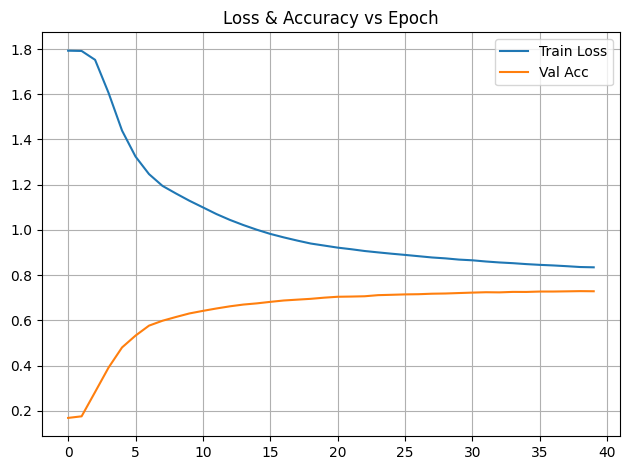

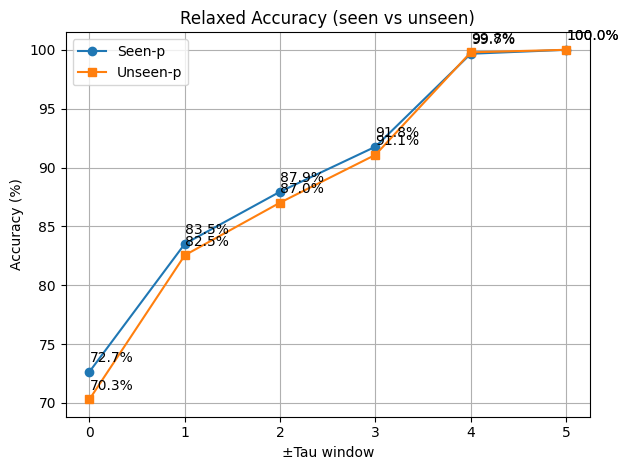

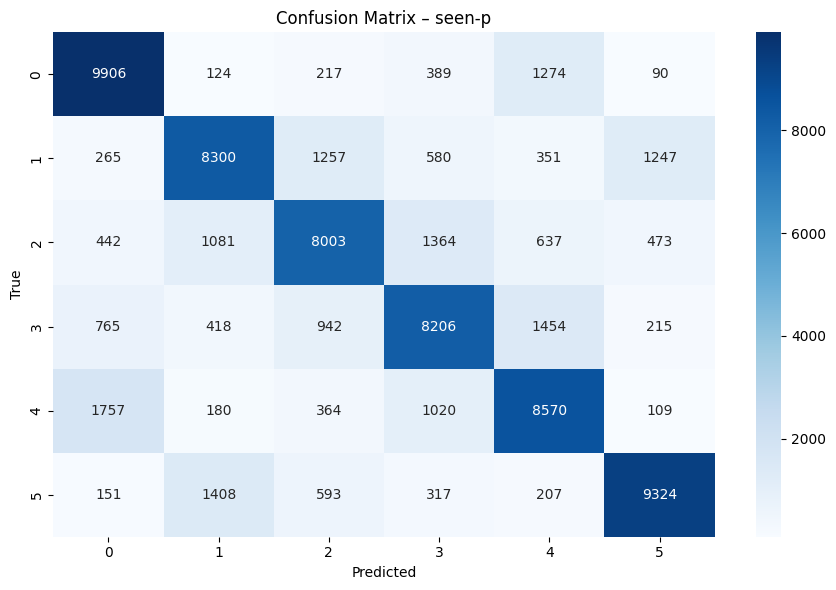

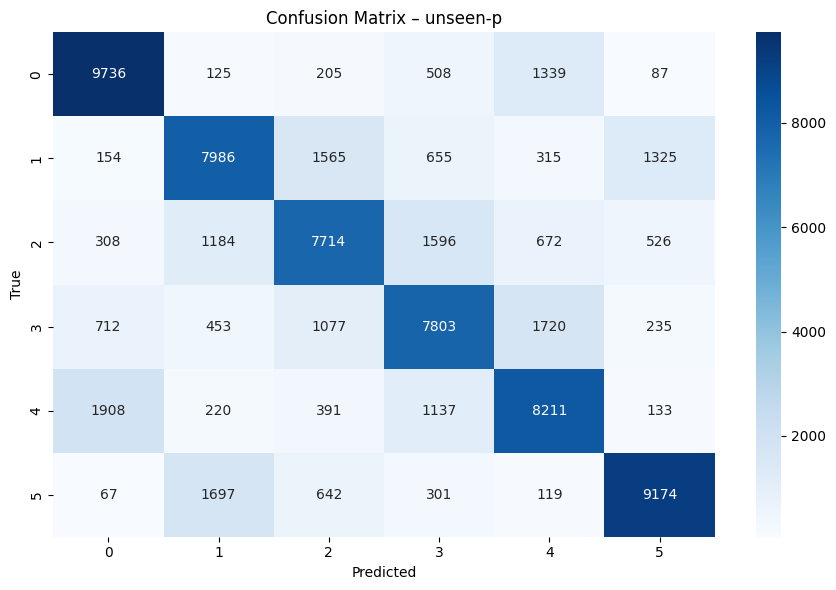

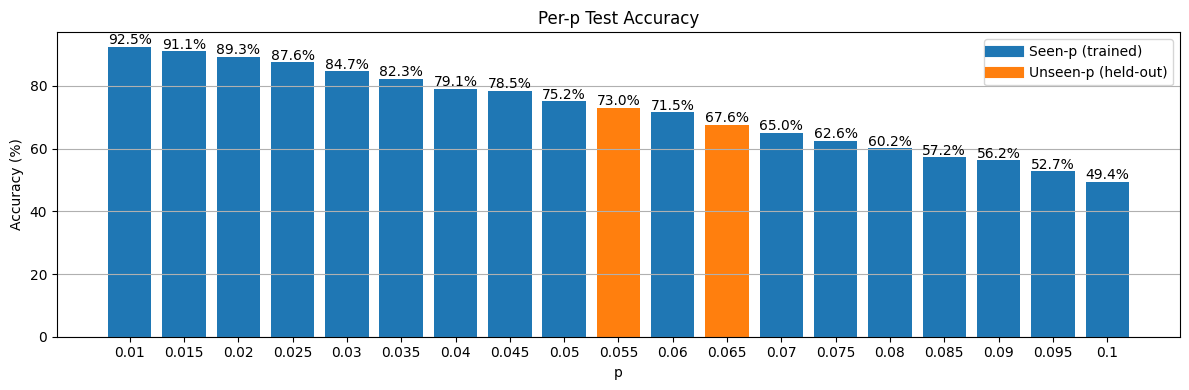


Per-p Accuracies (%):
  p=0.01     92.47   (seen )
  p=0.015    91.12   (seen )
  p=0.02     89.26   (seen )
  p=0.025    87.58   (seen )
  p=0.03     84.70   (seen )
  p=0.035    82.34   (seen )
  p=0.04     79.08   (seen )
  p=0.045    78.51   (seen )
  p=0.05     75.16   (seen )
  p=0.055    73.01   (UNSEEN)
  p=0.06     71.52   (seen )
  p=0.065    67.61   (UNSEEN)
  p=0.07     64.98   (seen )
  p=0.075    62.55   (seen )
  p=0.08     60.19   (seen )
  p=0.085    57.21   (seen )
  p=0.09     56.22   (seen )
  p=0.095    52.70   (seen )
  p=0.1      49.45   (seen )

Saved artifacts to Kaggle Output:
  state_dict -> /kaggle/working/cpd_multiP_T5_n15_seed0_train17_hold2_out_tpye_two_15_state.pth
  full model -> /kaggle/working/cpd_multiP_T5_n15_seed0_train17_hold2_out_tpye_two_15_full.pth
  TorchScript -> /kaggle/working/cpd_multiP_T5_n15_seed0_train17_hold2_out_tpye_two_15_model.pt
  metadata -> /kaggle/working/cpd_multiP_T5_n15_seed0_train17_hold2_out_tpye_two_15_meta.json
  ZIP bu

In [6]:
# ===================== CPD (multi-p) Training Script with Downloadable Artifacts =====================

# ---- Imports
import os, re, math, json, copy, random, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import trange

# ---------------- Config -----------------
SEED = 0
T = 5
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 120000
SAMPLES_PER_CLASS_VAL   = int(0.10 * SAMPLES_PER_CLASS_TRAIN)
SAMPLES_PER_CLASS_TEST  = int(0.10 * SAMPLES_PER_CLASS_TRAIN)  # per split
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# where your many-ps csvs live:
DATA_DIR = "/kaggle/input/cl15-3lakh-per-p-type2-nn-dataset/out_tpye_two_15"

# -------------- Reproducibility ----------
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# -------- Load all CSVs by (p, C) --------
# expect filenames like: bsc_p0.01_C1_n15_k11.csv  or  bsc_p0.07_C2_n15_k7.csv
rx = re.compile(r"bsc_p([0-9.]+)_C([12])_n15_k(11|7)\.csv$")
data = {}   # key: (p_float, "C1"/"C2") -> np.ndarray [n_codewords, FEATURE_SIZE]

for fn in os.listdir(DATA_DIR):
    m = rx.match(fn)
    if not m:
        continue
    p_val = float(m.group(1))
    C = "C" + m.group(2)
    arr = pd.read_csv(os.path.join(DATA_DIR, fn)).values
    data[(p_val, C)] = arr

# keep only p that have BOTH C1 and C2
ps_have_both = sorted({p for (p, C) in data.keys() if (p, "C1") in data and (p, "C2") in data})
assert len(ps_have_both) >= 4, "Need at least 4 different p to hold out 2 and still have variety."

# infer feature size
FEATURE_SIZE = next(iter(data.values())).shape[1]

# ---- choose two p values to hold out entirely ----
random.shuffle(ps_have_both)
HELDOUT_PS = sorted(ps_have_both[:2])           # unseen at train time
TRAIN_PS   = sorted(ps_have_both[2:])           # used for train/val
print("Held-out p values (UNSEEN in training):", HELDOUT_PS)
print("Seen p values (used for training):    ", TRAIN_PS)

print("Unique p values found:", ps_have_both)
print("Total unique p values:", len(ps_have_both))

# ------------- Data generator -------------
def _cycle(lst):
    while True:
        for x in lst:
            yield x

def generate_data_cpd_multi_ps(N_per_class, T, ps_pool, data_dict, balance=True):
    """
    Build sequences with same p across the whole sequence.
    For class 0 -> All-C1 (T from C1_p), class T -> All-C2 (T from C2_p),
    For class tau in 1..T-1 -> tau from C1_p then (T-tau) from C2_p, all at same p.
    If balance=True, allocate ~equal number of samples per p for each class.
    """
    X, y, p_of_sample = [], [], []
    ps_list = list(ps_pool)
    if balance:
        per_p = math.ceil(N_per_class / len(ps_list))
    g = _cycle(ps_list)

    for cls in range(NUM_CLASSES):
        made = 0
        while made < N_per_class:
            p = next(g)
            C1_arr = data_dict[(p, "C1")]
            C2_arr = data_dict[(p, "C2")]
            if cls == 0:
                idx = np.random.choice(len(C1_arr), T, replace=True)
                sample = C1_arr[idx]
            elif cls == T:
                idx = np.random.choice(len(C2_arr), T, replace=True)
                sample = C2_arr[idx]
            else:
                tau = cls
                idx1 = np.random.choice(len(C1_arr), tau, replace=True)
                idx2 = np.random.choice(len(C2_arr), T - tau, replace=True)
                sample = np.vstack([C1_arr[idx1], C2_arr[idx2]])
            X.append(sample); y.append(cls); p_of_sample.append(p)
            made += 1
    return np.array(X), np.array(y), np.array(p_of_sample)

# ------------- Build splits ----------------
# train/val from TRAIN_PS, tests built separately
X_train, y_train, p_train = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TRAIN, T, TRAIN_PS, data, balance=True)
X_val,   y_val,   p_val   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_VAL,   T, TRAIN_PS, data, balance=True)

# test on seen-p and unseen-p separately
X_test_seen,   y_test_seen,   p_test_seen   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, TRAIN_PS,   data, balance=True)
X_test_unseen, y_test_unseen, p_test_unseen = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, HELDOUT_PS, data, balance=True)

# --- basic checks + train label plot ---
print("Training samples:", len(y_train))
print("Validation samples:", len(y_val))
print("Test (seen-p) samples:", len(y_test_seen))
print("Test (unseen-p) samples:", len(y_test_unseen))

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class"); plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True); plt.tight_layout(); plt.show()

# ---------- Build per-p views from the ACTUAL test sets ----------
def per_p_views(X, y, p_arr):
    views = {}
    for p in sorted(np.unique(p_arr)):
        mask = (p_arr == p)
        views[p] = (X[mask], y[mask])
    return views

per_p_tests_seen   = per_p_views(X_test_seen,   y_test_seen,   p_test_seen)
per_p_tests_unseen = per_p_views(X_test_unseen, y_test_unseen, p_test_unseen)
per_p_tests_all = {**per_p_tests_seen, **per_p_tests_unseen}  # merged for printing

# --------- Dataset & Loaders --------------
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_seen_loader   = DataLoader(ChangepointDataset(X_test_seen,   y_test_seen),   batch_size=BATCH_SIZE)
test_unseen_loader = DataLoader(ChangepointDataset(X_test_unseen, y_test_unseen), batch_size=BATCH_SIZE)

# --------------- Model --------------------
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels!=out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)
    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, 3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, 5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, 7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels*3)
    def forward(self, x):
        x1 = self.branch1(x); x2 = self.branch2(x); x3 = self.branch3(x)
        return F.relu(self.bn(torch.cat([x1,x2,x3], dim=1)))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 ch
        if input_length <= 15:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,128))
        else:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,96),
                                            ResidualBlock1D(96,128), ResidualBlock1D(128,128))
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(128,128), nn.ReLU(), nn.Dropout(0.5),
                                        nn.Linear(128,num_classes))
    def forward(self, x):
        x = x.permute(0,2,1)            # [B,T,F] -> [B,F,T]
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.pool(x)
        return self.classifier(x)

# -------------- Train ---------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(FEATURE_SIZE, NUM_CLASSES, T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc, epochs_no_improve = 0.0, 0
best_state = copy.deepcopy(model.state_dict())
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training"):
    model.train()
    running = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running += loss.item()
    train_loss = running / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)
    print(f"Epoch {epoch+1:02d} | TrainLoss {train_loss:.4f} | ValAcc {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping.")
            break

# -------------- Evaluation helpers --------
def eval_loader(loader):
    model.eval()
    ys, yhats = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            pred = model(xb).argmax(1).cpu().numpy()
            ys.extend(yb.numpy()); yhats.extend(pred)
    ys = np.array(ys); yhats = np.array(yhats)
    return ys, yhats

def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

# restore best
model.load_state_dict(best_state)

# overall seen/unseen
y_seen,  yhat_seen  = eval_loader(test_seen_loader)
y_un,    yhat_un    = eval_loader(test_unseen_loader)

acc_seen   = accuracy_score(y_seen, yhat_seen)
acc_unseen = accuracy_score(y_un,   yhat_un)
print(f"\nTest Accuracy (seen-p):   {acc_seen:.4f}")
print(f"Test Accuracy (unseen-p): {acc_unseen:.4f}")

# ---------- Overall combined accuracy ----------
total_correct = (y_seen == yhat_seen).sum() + (y_un == yhat_un).sum()
total_samples = len(y_seen) + len(y_un)
overall_acc   = total_correct / total_samples
print(f"Overall Test Accuracy (seen+unseen): {overall_acc:.4f}")

# per-p accuracies
per_p_acc = {}
for p, (Xp, yp) in per_p_tests_all.items():
    dl = DataLoader(ChangepointDataset(Xp, yp), batch_size=BATCH_SIZE)
    yt, yhat = eval_loader(dl)
    per_p_acc[p] = accuracy_score(yt, yhat)

# -------------- Plots ---------------------
# training curves
plt.figure(); plt.plot(train_losses, label="Train Loss"); plt.plot(val_accuracies, label="Val Acc")
plt.title("Loss & Accuracy vs Epoch"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# relaxed accuracy curves
wins = list(range(6))
rel_seen   = [relaxed_accuracy(y_seen, yhat_seen, w)*100   for w in wins]
rel_unseen = [relaxed_accuracy(y_un,   yhat_un,   w)*100   for w in wins]
plt.figure(); plt.plot(wins, rel_seen,  marker='o', label='Seen-p')
plt.plot(wins, rel_unseen, marker='s', label='Unseen-p')
for x,y in zip(wins, rel_seen):  plt.text(x, y+0.8,  f"{y:.1f}%")
for x,y in zip(wins, rel_unseen):plt.text(x, y+0.8,  f"{y:.1f}%")
plt.xlabel("±Tau window"); plt.ylabel("Accuracy (%)"); plt.title("Relaxed Accuracy (seen vs unseen)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# confusion matrices
def show_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(NUM_CLASSES))
    plt.figure(figsize=(9,6)); sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()
show_cm(y_seen, yhat_seen,  "Confusion Matrix – seen-p")
show_cm(y_un,   yhat_un,    "Confusion Matrix – unseen-p")

# per-p bar chart
ps_sorted = sorted(per_p_acc.keys())
vals = [per_p_acc[p]*100 for p in ps_sorted]
colors = ["tab:blue" if p in TRAIN_PS else "tab:orange" for p in ps_sorted]
plt.figure(figsize=(12,4))
plt.bar([str(p) for p in ps_sorted], vals, color=colors)
for i,v in enumerate(vals): plt.text(i, v+0.8, f"{v:.1f}%", ha='center')
plt.title("Per-p Test Accuracy"); plt.xlabel("p"); plt.ylabel("Accuracy (%)")
legend_patches = [plt.Line2D([0],[0], color='tab:blue', lw=8, label='Seen-p (trained)'),
                  plt.Line2D([0],[0], color='tab:orange', lw=8, label='Unseen-p (held-out)')]
plt.legend(handles=legend_patches); plt.grid(True, axis='y'); plt.tight_layout(); plt.show()

print("\nPer-p Accuracies (%):")
for p in ps_sorted:
    tag = "seen " if p in TRAIN_PS else "UNSEEN"
    print(f"  p={p:<6}  {per_p_acc[p]*100:6.2f}   ({tag})")

# ================== SAVE + MAKE DOWNLOADABLE (Kaggle Output) ==================
OUTPUT_DIR = "/kaggle/working"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Use a dataset-tagged prefix; include counts of seen/held-out ps and the folder name
ds_root = os.path.basename(os.path.normpath(DATA_DIR))  # e.g., "out_tpye_two_15"
prefix = f"cpd_multiP_T{T}_n{FEATURE_SIZE}_seed{SEED}_train{len(TRAIN_PS)}_hold{len(HELDOUT_PS)}_{ds_root}"

TS_PATH    = os.path.join(OUTPUT_DIR, f"{prefix}_model.pt")   # TorchScript
STATE_PATH = os.path.join(OUTPUT_DIR, f"{prefix}_state.pth")  # state_dict
FULL_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_full.pth")   # full pickled model
META_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_meta.json")  # metadata
ZIP_PATH   = os.path.join(OUTPUT_DIR, f"{prefix}_artifacts.zip")

# 1) Best state_dict (recommended)
torch.save(best_state, STATE_PATH)

# 2) Full Python model (optional; tied to this class definition)
torch.save(model, FULL_PATH)

# 3) TorchScript export on CPU (portable)
model_cpu = copy.deepcopy(model).to("cpu").eval()
try:
    scripted = torch.jit.script(model_cpu)
except Exception:
    example = torch.randn(1, T, FEATURE_SIZE)
    scripted = torch.jit.trace(model_cpu, example)
scripted.save(TS_PATH)

# 4) Minimal metadata (rich, including per-p results)
meta = {
    "T": int(T),
    "num_classes": int(NUM_CLASSES),
    "feature_size": int(FEATURE_SIZE),
    "seed": int(SEED),
    "train_ps": TRAIN_PS,
    "heldout_ps": HELDOUT_PS,
    "val_best_acc": float(best_val_acc),
    "test_seen_acc": float(acc_seen),
    "test_unseen_acc": float(acc_unseen),
    "test_overall_acc": float(overall_acc),
    "per_p_acc": {str(p): float(per_p_acc[p]) for p in per_p_acc},
    "model_class": model.__class__.__name__,
    "pytorch_version": torch.__version__,
    "data_dir": DATA_DIR,
    "label_names": ["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"],
}
with open(META_PATH, "w") as f:
    json.dump(meta, f, indent=2)

# 5) Bundle everything for one-click download in Kaggle Output
with zipfile.ZipFile(ZIP_PATH, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write(STATE_PATH, arcname=os.path.basename(STATE_PATH))
    z.write(FULL_PATH,  arcname=os.path.basename(FULL_PATH))
    z.write(TS_PATH,    arcname=os.path.basename(TS_PATH))
    z.write(META_PATH,  arcname=os.path.basename(META_PATH))

print("\nSaved artifacts to Kaggle Output:")
print("  state_dict ->", STATE_PATH)
print("  full model ->", FULL_PATH)
print("  TorchScript ->", TS_PATH)
print("  metadata ->", META_PATH)
print("  ZIP bundle  ->", ZIP_PATH)
print("\nThese appear in the right-side 'Output' panel for download.")
# ====================================================================================================


In [31]:
import shutil

shutil.make_archive("Type2_NN_cl_15_Results", 'zip', "Type2_NN_cl_15_Results")

'/kaggle/working/Type2_NN_cl_15_Results.zip'